<a href="https://colab.research.google.com/github/Rudy-Nzau/Coursera_Capstone/blob/master/Notebook_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# <font color='royalblue'><h1 align=center><font size=5> <font color='royalblue'>Analysez des données de systèmes éducatifs</font>
<p>    <font color='black'> par RUDY NZAU




# **I/ Introduction**


##Objectif
* Comprehension des données
* Sugerer des pays dans lesquels EdTech peut s'implanter

## Problématiques
<p>
<ul>
    <li>Quels sont les pays avec un fort potentiel de clients pour nos services ?</li>
    <li>Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?</li>
    <li>Dans quels pays l'entreprise doit-elle opérer en priorité ?</li>
</ul>
</p>

#**II/ Analyse générale et découverte des fichiers**

##Import des données


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Country = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Openclassrooms/Project_2/1-ORIGINAL DATA/Edstats_csv/EdStatsCountry.csv")
Series = pd.read_csv ("/content/drive/MyDrive/Colab Notebooks/Openclassrooms/Project_2/1-ORIGINAL DATA/Edstats_csv/EdStatsSeries.csv")
Data = pd.read_csv ("/content/drive/MyDrive/Colab Notebooks/Openclassrooms/Project_2/1-ORIGINAL DATA/Edstats_csv/EdStatsData.csv")
FootNote = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Openclassrooms/Project_2/1-ORIGINAL DATA/Edstats_csv/EdStatsFootNote.csv")
Country_Series = pd.read_csv ("/content/drive/MyDrive/Colab Notebooks/Openclassrooms/Project_2/1-ORIGINAL DATA/Edstats_csv/EdStatsCountry-Series.csv")

## Description des fichiers


Nous disposons de 5 documents différents. Mon premier objectif va être de procéder à leur description un à un.

### EdStats Country

In [ ]:
Country.head() 

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onward; the base year changed to 2002.",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accounts methodology.,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are rescaled.,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09","Living Standards Measurement Study Survey (LSMS), 2012",Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accounts methodology.,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from administrative registers.,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [ ]:
#On chnage le format des dataframe afin de voir tout ce qu'il y a dans les cases et mieux comprendre le document
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [ ]:
Country.shape

(241, 32)

In [ ]:
Country["Country Code"].nunique()

241

Le document donne des informations économiques sur 241 pays ("Short Name") qui sont également regroupés par région ("Region").

In [ ]:
output = Country.drop_duplicates()
output.groupby('Short Name').size()

Short Name
Afghanistan                                       1
Albania                                           1
Algeria                                           1
American Samoa                                    1
Andorra                                           1
Angola                                            1
Antigua and Barbuda                               1
Arab World                                        1
Argentina                                         1
Armenia                                           1
Aruba                                             1
Australia                                         1
Austria                                           1
Azerbaijan                                        1
Bahrain                                           1
Bangladesh                                        1
Barbados                                          1
Belarus                                           1
Belgium                                           1
B

 **!!** Il y a des groupes de pays sur certaines lignes, ce qui risque de nous géner dans l'exploitation de ce document (eg on ne peut pas compter la France et l'UE).

In [ ]:
Wrong_Names = ['World',
               'Upper middle income',
               'Sub-Saharan Africa (developing only)',
               'Sub-Saharan Africa (all income levels)',
               'OECD members',
               'North America',
               'Middle income',
               'Middle East & North Africa (developing only)',
               'Middle East & North Africa (all income levels)',
               'Lower middle income',
               'Low income',
               'Low & middle income',
               'Least developed countries: UN classification',
               'Latin America & Caribbean (developing only)',
               'Latin America & Caribbean (all income levels)',
               'High income',
               'Heavily indebted poor countries (HIPC)',
               'European Union',
               'Europe & Central Asia (developing only)',
               'Europe & Central Asia (all income levels)',
               'Euro area',
               'East Asia & Pacific (developing only)',
               'East Asia & Pacific (all income levels)',
               'Arab World']

In [ ]:
Country [Country['Short Name'].isin(Wrong_Names)]['Short Name'].shape

(24,)

In [ ]:
Country[~Country['Short Name'].isin(Wrong_Names)]['Short Name'].shape

(217,)

Le résultat est cohérent,  il nous reste une liste de 217 pays uniques après avoir retiré les régions de la colonne 'Short Name'.

In [ ]:
IndexNames= Country [Country['Short Name'].isin(Wrong_Names)].index

In [ ]:
Country.drop (IndexNames, inplace = True)

In [ ]:
Country.shape

(217, 32)

In [ ]:
List_Countries = Country[~Country['Short Name'].isin(Wrong_Names)]['Short Name'].unique().tolist()

On peut regarder comment ces 217 pays sont répartis dans les régions.

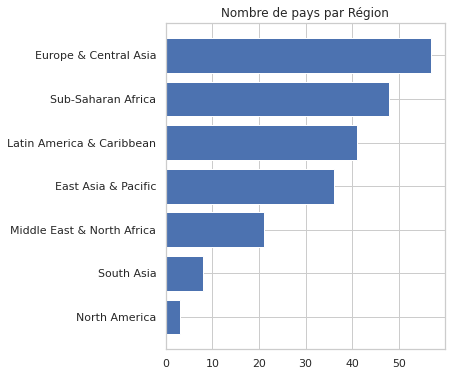

In [ ]:
plt.figure(figsize=(5,6))
plt.barh(y = Country.groupby('Region')[['Short Name']].count().reset_index().sort_values(by='Short Name')['Region'], width = Country.groupby('Region')[['Short Name']].count()['Short Name'].sort_values())
plt.title('Nombre de pays par Région')
plt.show()

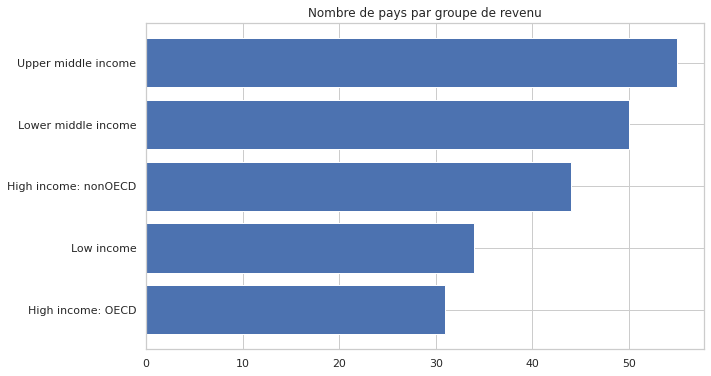

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(y = Country.groupby('Income Group')[['Short Name']].count().reset_index().sort_values(by='Short Name')['Income Group'], width = Country.groupby('Income Group')[['Short Name']].count()['Short Name'].sort_values())
plt.title('Nombre de pays par groupe de revenu')
plt.show()

### EdStats Country Series

In [ ]:
Country_Series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN


Observation: On a une colonne "Country Code" comme pour le document Country. On va vérifier s'il s'agit des mêmes.

In [ ]:
Country_Series['CountryCode'].nunique()

211

Il y a 6 codes pays en moins par rapport à la colonne "Country Code" du document Country.

In [ ]:
Country[~Country['Country Code'].isin(Country_Series['CountryCode'].unique())][['Short Name']]


,Short Name
47,Curaçao
134,St. Martin (French part)
166,Nauru
187,South Asia
199,South Sudan
207,Sint Maarten (Dutch part)


Il s'agit soit d'îles ( Sint Maarten) ou de groupes de pays que je pense déjà écarter pour faciliter mon analyse. 

---



In [ ]:
Country_Series ["SeriesCode"].nunique()


21

In [ ]:
Country_Series ["Unnamed: 3"].nunique()

0

In [ ]:
Country_Series.drop(["Unnamed: 3"], axis = 'columns', inplace = True)

In [ ]:
Country_Series.head()

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population Prospects
1,ABW,SP.POP.GROW,Data sources: United Nations World Population Prospects
2,AFG,SP.POP.GROW,Data sources: United Nations World Population Prospects
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population Prospects


### EdStats Data

In [ ]:
Data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Data.shape

(886930, 70)

In [ ]:
Data ['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


In [ ]:
data_orig= Data.copy()

In [ ]:
data_decades= Data.copy()

In [ ]:
Data['Indicator Name'].unique()

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       ..., 'Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)'],
      dtype=object)

In [ ]:
Data['Indicator Name'].nunique()


3665

In [ ]:

Data['Country Name'].nunique()

242

In [ ]:
Data['Indicator Code'].nunique() * Data['Country Name'].nunique()

886930

Cela correspond exactement au nombre de ligne qu'il y a sur le document. Donc il n'y a pas de doublons.

In [ ]:
Data ['Indicator Code'].nunique()

3665

Il y n'y a pas de doublons non plus pour les indicateurs.

In [ ]:
Data[~Data['Country Code'].isin(Country_Series['CountryCode'].unique())]['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'British Virgin Islands',
       'Curacao', 'Nauru', 'Sint Maarten (Dutch part)', 'South Sudan',
       'St. Martin (French part)'], dtype=object)

Observation : Cette ligne de code nous permet de confirmer que nous avons bien la même liste de pays dans Data et Country_Series.

Maintenant il faut trouver quels indicateurs sont le plus utilisés.

In [ ]:
Data ['Indicator Name'].tolist()

['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, gender parity index (GPI)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
 'Adjusted net intake rate to Grade 1 of primary education, female (%)',
 'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)',
 'Adjusted 

In [ ]:
import collections
Indicateurs_Utilisés = [i.split(' ', 1)[0] for i in Data['Indicator Name'].tolist()]
Indicateurs_Utilisés = collections.Counter(Indicateurs_Utilisés).most_common(30)

In [ ]:
df_Indicateurs_Utilisés = pd.DataFrame(Indicateurs_Utilisés, columns = ['Mot', 'Nombre utilisé']).sort_values(by= 'Nombre utilisé', ascending=False)

In [ ]:
df_Indicateurs_Utilisés

,Mot,Nombre utilisé
0,EGRA:,97526
1,Barro-Lee:,87120
2,Wittgenstein,74536
3,UIS:,58322
4,Percentage,57838
5,SABER:,52030
6,"Population,",46706
7,PASEC:,33880
8,DHS:,31460
9,LLECE:,30734


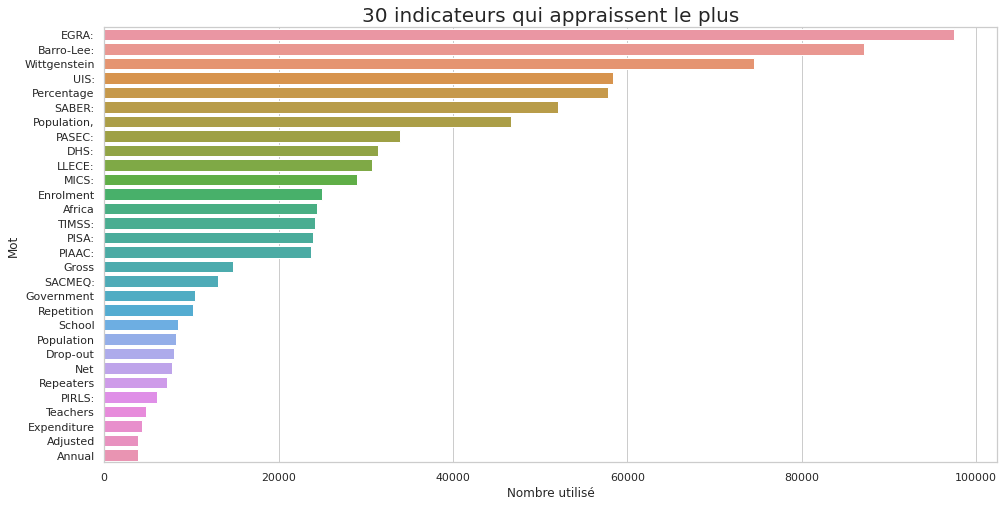

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.barplot(y = 'Mot', x='Nombre utilisé', data = df_Indicateurs_Utilisés)
plt.title('30 indicateurs qui appraissent le plus', size=20)
plt.show()


En vérifiant sur google, on sait que les indicateurs les plus utilisés concernent des données sur l'éducation.



*   The Early Grade Reading Assessment (EGRA) is a diagnostic instrument designed to quickly assess foundational skills for literacy acquisition of pupils in Early Grades of primary school.
*   BARRO LEE : provides educational attainment data for 146 countries in 5-year intervals from 1950 to 2010. It also provides information about the distribution of educational attainment of the adult population over age 15 and over age 25 by sex at seven levels of schooling.


*   Wittgenstein Projection: Percentage Of The Population Age 25+ By Highest Level Of Educational Attainment.





 ### EdStats Footnote

In [ ]:
FootNote.info

<bound method DataFrame.info of        CountryCode      SeriesCode    Year  \
0       ABW         SE.PRE.ENRL.FE  YR2001   
1       ABW         SE.TER.TCHR.FE  YR2005   
2       ABW         SE.PRE.TCHR.FE  YR2000   
3       ABW         SE.SEC.ENRL.GC  YR2004   
4       ABW         SE.PRE.TCHR     YR2006   
...     ...                 ...        ...   
643633  ZWE         SH.DYN.MORT     YR2007   
643634  ZWE         SH.DYN.MORT     YR2014   
643635  ZWE         SH.DYN.MORT     YR2015   
643636  ZWE         SH.DYN.MORT     YR2017   
643637  ZWE         SP.POP.GROW     YR2017   

                                   DESCRIPTION  Unnamed: 4  
0       Country estimation.                    NaN          
1       Country estimation.                    NaN          
2       Country estimation.                    NaN          
3       Country estimation.                    NaN          
4       Country estimation.                    NaN          
...                     ...                     .

In [ ]:
FootNote.head(20)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN
5,ABW,SE.PRE.NENR,YR2000,Country estimation.,NaN
6,ABW,SE.SEC.ENRL.VO.FE,YR2005,Country estimation.,NaN
7,ABW,SE.SEC.ENRL.GC,YR2003,Country estimation.,NaN
8,ABW,SE.PRM.TCHR.FE,YR1999,Country estimation.,NaN
9,ABW,SE.PRE.TCHR.FE.ZS,YR2008,Country estimation.,NaN


In [ ]:
FootNote ["CountryCode"].nunique()

239

In [ ]:
FootNote["SeriesCode"].nunique()

1558

In [ ]:
FootNote ["CountryCode"].nunique() * FootNote["SeriesCode"].nunique()

372362

In [ ]:
FootNote["Year"].unique()

array(['YR2001', 'YR2005', 'YR2000', 'YR2004', 'YR2006', 'YR2003',
       'YR1999', 'YR2008', 'YR2002', 'YR2007', 'YR2017', 'YR2010',
       'YR2009', 'YR2011', 'YR2012', 'YR2015', 'YR2014', 'YR1970',
       'YR1971', 'YR1972', 'YR1973', 'YR1974', 'YR1975', 'YR1976',
       'YR1977', 'YR1978', 'YR1979', 'YR1980', 'YR1981', 'YR1982',
       'YR1983', 'YR1984', 'YR1985', 'YR1986', 'YR1987', 'YR1988',
       'YR1989', 'YR1990', 'YR1991', 'YR1992', 'YR1993', 'YR1994',
       'YR1995', 'YR1996', 'YR1997', 'YR1998', 'YR2013', 'YR2016',
       'YR2020', 'YR2025', 'YR2030', 'YR2035', 'YR2040', 'YR2045',
       'YR2050', 'yr2012'], dtype=object)

In [ ]:
FootNote["Year"] = FootNote["Year"].apply(lambda x : x[2:])

In [ ]:
FootNote ["Year"].sort_values().unique()

array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2020', '2025', '2030', '2035', '2040', '2045', '2050'],
      dtype=object)

On a les mêmes années que dans Data mais ça s'arrête à 2050 ici.

On va regrouper les dates par décénies pour faciliter la lecture de la répartition des données.

In [ ]:
FootNote["DESCRIPTION"].nunique()

9102

In [ ]:
FootNote ["Unnamed: 4"].unique()

array([nan])

In [ ]:
FootNote.drop(["Unnamed: 4"], axis=1, inplace=True)


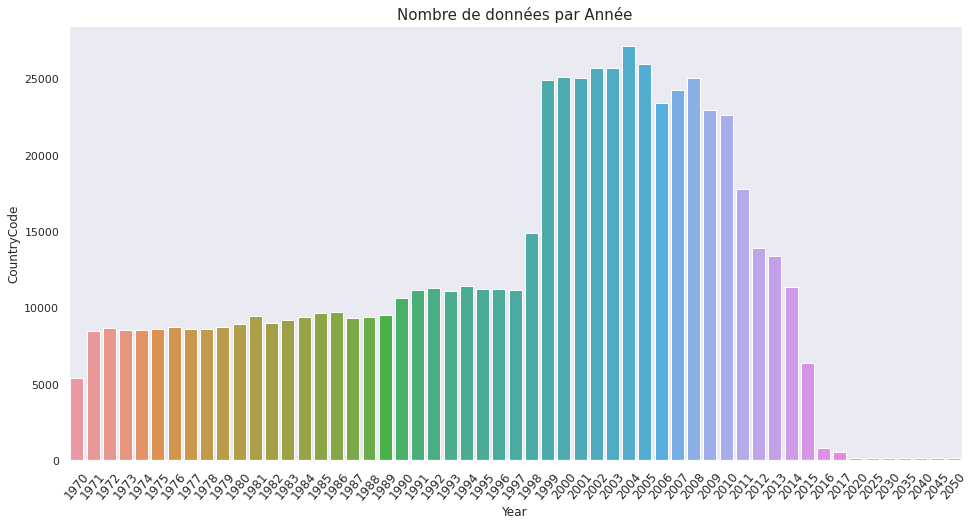

In [ ]:
sns.set(style="dark")
plt.figure(figsize=(16, 8))
plt.title('Nombre de données par Année', size=15)
plot = sns.barplot(y = 'CountryCode', x='Year', data = FootNote.groupby('Year').count().reset_index())
plot.set_xticklabels(labels = FootNote.groupby('Year').count().reset_index()['Year'], rotation=50, size=12)
plt.show()

### EdStats Series

In [ ]:
Series.info

<bound method DataFrame.info of                       Series Code         Topic  \
0     BAR.NOED.1519.FE.ZS          Attainment     
1     BAR.NOED.1519.ZS             Attainment     
2     BAR.NOED.15UP.FE.ZS          Attainment     
3     BAR.NOED.15UP.ZS             Attainment     
4     BAR.NOED.2024.FE.ZS          Attainment     
...                   ...                 ...     
3660  UIS.XUNIT.USCONST.3.FSGOV    Expenditures   
3661  UIS.XUNIT.USCONST.4.FSGOV    Expenditures   
3662  UIS.XUNIT.USCONST.56.FSGOV   Expenditures   
3663  XGDP.23.FSGOV.FDINSTADM.FFD  Expenditures   
3664  XGDP.56.FSGOV.FDINSTADM.FFD  Expenditures   

                                                                     Indicator Name  \
0     Barro-Lee: Percentage of female population age 15-19 with no education          
1     Barro-Lee: Percentage of population age 15-19 with no education                 
2     Barro-Lee: Percentage of female population age 15+ with no education            
3     B

In [ ]:
Series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ with no education,Percentage of population age 15+ with no education,Percentage of population age 15+ with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 20-24 with no education,Percentage of female population age 20-24 with no education,Percentage of female population age 20-24 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dans ce document on retrouve des données relatives à l'éducation que l'on a vu dans des documeents précédents. En plus de cela il y a des indicateurs relatifs au développemnt économique des pays.

In [ ]:
Series['Series Code'].nunique() == Data['Indicator Code'].nunique()

True

In [ ]:
Series ["Unit of measure"].nunique()

0

On a le même nombre d'indicateur dans la colonne "Series Code" de Series et "Indicator Code" de Data, donc potentiellement les mêmes indicateurs comme le Barro-Lee percentage.

## Bilan sur le data set

**Country** : Informations sur les pays : région, monnaie, Système de commerce..
Taille: 241 lignes et, 32 colonnes
Variables qualitatives: 28
Variables quantitatives: 3
Doublon :0

**Country Series** : Informations sur les sources des données contenues dans EdStatsData  pour les indicateurs de population :”SP.POP.GROW”,'SP.POP.TOTL', etc.
Taille: 613 lignes et 4 colonnes
Variables qualitatives:3
Variables quantitatives:1
Doublon :0

**Data** : Des séries temporelles des indicateurs pour tous les pays de 1970 et 2100
Taille: 886930 lignes et 70 colonnes
Variables qualitatives:4 variables
Variables quantitatives: 66 variables
Valeurs manquante: Beaucoup pour les variables quantitatives
Doublon :0

**Footnote** : Des informations complémentaire sur les indicateurs de chaque pays : leurs source ,méthode de calcul (juste 1558 indicateurs)
Taille: 643638 lignes et 4 colonnes
Variables qualitatives:4
Variables quantitatives:0
Doublon :0

**Series** : Les informations sur les indicateurs: définitions, année d'apparition, méthode..
Taille: 3665 lignes et 21 colonnes
Valeurs manquante:10 colonnes sont vides
Variables qualitatives:15
Variables quantitatives:6
Doublon :0


#**III/ Analyse exploratoire des données**

## EdStats Data

In [ ]:
Data_2 = Data.copy()

In [ ]:
FootNote_2= FootNote.copy()

In [ ]:
Data['1970s'] = Data[[str(year) for year in range(1970,1980,1)]].mean(1)
Data['1980s'] = Data[[str(year) for year in range(1980,1990,1)]].mean(1)
Data['1990s'] = Data[[str(year) for year in range(1990,2000,1)]].mean(1)
Data['2000s'] = Data[[str(year) for year in range(2000,2010,1)]].mean(1)
Data['2010s'] = Data[[str(year) for year in [2010,2011,2012,2013,2014,2015,2016,2017]]].mean(1)
Data['2020s'] = Data[[str(year) for year in [2020,2025]]].mean(1)
Data['2030s'] = Data[[str(year) for year in [2030,2035]]].mean(1)
Data['2040s'] = Data[[str(year) for year in [2040,2045]]].mean(1)
Data['2050s'] = Data[[str(year) for year in [2050,2055]]].mean(1)
Data['2060s'] = Data[[str(year) for year in [2060,2065]]].mean(1)
Data['2070s'] = Data[[str(year) for year in [2070,2075]]].mean(1)
Data['2080s'] = Data[[str(year) for year in [2080,2085]]].mean(1)
Data['2090s'] = Data[[str(year) for year in [2090,2095]]].mean(1)
Data['2100s'] = Data[[str(2100)]].mean(1)

In [ ]:
Data.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'], axis=1, inplace=True)

In [ ]:
Data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,59.054873,68.752447,72.924749,81.517323,85.47818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


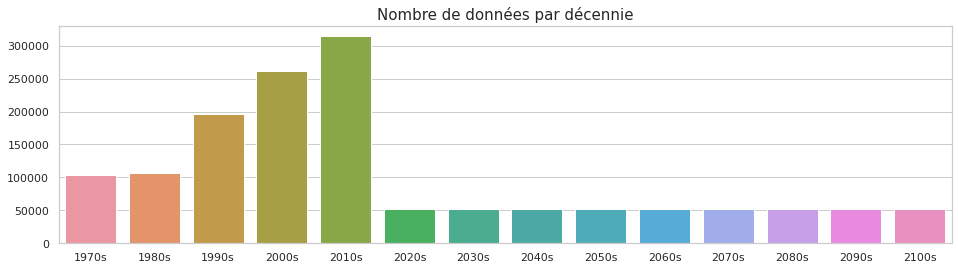

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 4))
plt.title('Nombre de données par décennie', size=15)
plot = sns.barplot(y = Data.shape[0] - Data[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].isna().sum().values, x = Data[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].isna().sum().index)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


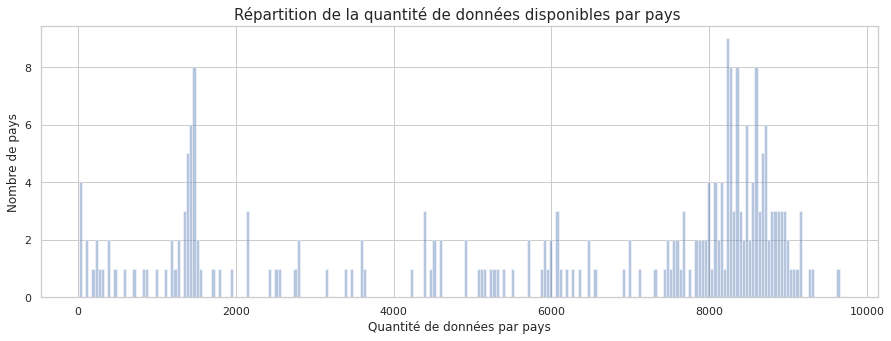

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
plt.xlabel('Quantité de données par pays', size=12)
plt.ylabel('Nombre de pays', size=12)
plt.title('Répartition de la quantité de données disponibles par pays ', size=15)
plot = sns.distplot(Data.groupby('Country Name')[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].count().sum(axis=1).sort_values().values, bins = 241, norm_hist = False, hist_kws=dict(cumulative=False),
             kde = False)
plt.show()

## Edstats Country

In [ ]:
Country.isna().sum().sort_values(ascending=False)

Unnamed: 31                                          217
National accounts reference year                     185
Alternative conversion factor                        170
Other groups                                         159
Latest industrial data                               110
Vital registration complete                          106
Special Notes                                        96 
External debt Reporting status                       93 
Latest household survey                              76 
Latest agricultural census                           75 
Lending category                                     73 
PPP survey year                                      72 
Source of most recent Income and expenditure data    57 
Government Accounting concept                        56 
Latest water withdrawal data                         38 
IMF data dissemination standard                      36 
Balance of Payments Manual in use                    36 
Latest trade data              

In [ ]:
Country.duplicated(keep=False).sum()


0

## EdStats Country Series

In [ ]:
Country_Series.isna().sum().sort_values(ascending=False)


DESCRIPTION    0
SeriesCode     0
CountryCode    0
dtype: int64

In [ ]:
Country_Series.duplicated(keep=False).sum()


0

In [ ]:
Data.isna().sum().sort_values(ascending=False)


2100s             835494
2080s             835494
2070s             835494
2060s             835494
2050s             835494
2040s             835494
2030s             835494
2020s             835494
2090s             835494
1970s             783909
1980s             780067
1990s             690339
2000s             626092
2010s             572655
Indicator Code    0     
Indicator Name    0     
Country Code      0     
Country Name      0     
dtype: int64

In [ ]:
Data.duplicated(keep=False).sum()


0

In [ ]:
FootNote.isna().sum().sort_values(ascending=False)


DESCRIPTION    0
Year           0
SeriesCode     0
CountryCode    0
dtype: int64

In [ ]:
FootNote.duplicated(keep=False).sum()


0

In [ ]:
Series.isna().sum().sort_values(ascending=False)


Unnamed: 20                            3665
Related indicators                     3665
Other web links                        3665
Unit of measure                        3665
License Type                           3665
Notes from original source             3665
Development relevance                  3662
General comments                       3651
Limitations and exceptions             3651
Statistical concept and methodology    3642
Aggregation method                     3618
Periodicity                            3566
Related source links                   3450
Base Period                            3351
Other notes                            3113
Short definition                       1509
Source                                 0   
Long definition                        0   
Indicator Name                         0   
Topic                                  0   
Series Code                            0   
dtype: int64

In [ ]:
Series.duplicated(keep=False).sum()


0

# Choix indicateurs

In [ ]:
Country.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onward; the base year changed to 2002.",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accounts methodology.,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are rescaled.,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09","Living Standards Measurement Study Survey (LSMS), 2012",Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accounts methodology.,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from administrative registers.,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [ ]:
Data = Data.merge(right = Country[['Country Code', 'Region']], 
                  on='Country Code', how='left')

In [ ]:
Data

,Country Name,Country Code,Indicator Name,Indicator Code,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s,Region
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,59.054873,68.752447,72.924749,81.517323,85.478180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male (number)",UIS.LP.AG15T24.M,NaN,47631.000000,38800.000000,NaN,183071.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, both sexes (%)",SE.ADT.1524.LT.ZS,NaN,89.021851,95.411362,NaN,90.679410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, female (%)",SE.ADT.1524.LT.FE.ZS,NaN,84.812241,94.353439,NaN,92.656455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, gender parity index (GPI)",SE.ADT.1524.LT.FM.ZS,NaN,0.903920,0.977340,NaN,1.046085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa


In [ ]:
Data_Specific = Data[['Country Name', 'Country Code', 'Indicator Name', 
                   'Indicator Code', '2010s', 'Region']]

In [ ]:
Data_Specific[['Indicator Name', '2010s']].groupby('Indicator Name').count().sort_values(by='2010s',ascending=False)


,2010s
Indicator Name,
"Population, total",240
Population growth (annual %),240
GDP per capita (current US$),229
GDP at market prices (current US$),229
Internet users (per 100 people),229
...,...
EGRA: Listening Comprehension - Share of students with a zero score (%). Songhoi. 2nd Grade,0
EGRA: Correct Letter Sounds Read Per Minute (Mean). English. 4th Grade,0
"SACMEQ: Mean performance on the reading scale, total",0


In [ ]:
regions = Country['Region'].unique().tolist()

In [ ]:
groupes_pays = ['Arab World',
         'East Asia & Pacific',
         'East Asia & Pacific (excluding high income)',
         'Euro area',
         'Europe & Central Asia',
         'Europe & Central Asia (excluding high income)',
         'European Union',
         'Heavily indebted poor countries (HIPC)',
         'High income',
         'Latin America & Caribbean',
         'Latin America & Caribbean (excluding high income)',
         'Least developed countries: UN classification',
         'Low & middle income',
         'Low income',
         'Lower middle income',
         'Middle East & North Africa',
         'Middle East & North Africa (excluding high income)',
         'Middle income',
         'North America',
         'OECD members',
         'South Asia',
         'Sub-Saharan Africa',
         'Sub-Saharan Africa (excluding high income)',
         'Upper middle income',
         'World']

In [ ]:
Data_Specific['NaN'] = Data_Specific[['Indicator Code', 'Country Name', '2010s']]['2010s'].isna().astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Heat Map Data

In [ ]:
Data_Countries =  Data_Specific[~Data_Specific['Country Name'].isin(groupes_pays)][['Country Name', 'Indicator Code', 'NaN']].pivot(index='Country Name', columns='Indicator Code', values='NaN')
Data_groupes =  Data_Specific[Data_Specific['Country Name'].isin(groupes_pays)][['Country Name', 'Indicator Code', 'NaN']].pivot(index='Country Name', columns='Indicator Code', values='NaN')

In [ ]:
Data_groupes.drop(Data_groupes.loc[:, Data_groupes.sum()==0].columns.tolist(), axis=1, inplace=True)


[]

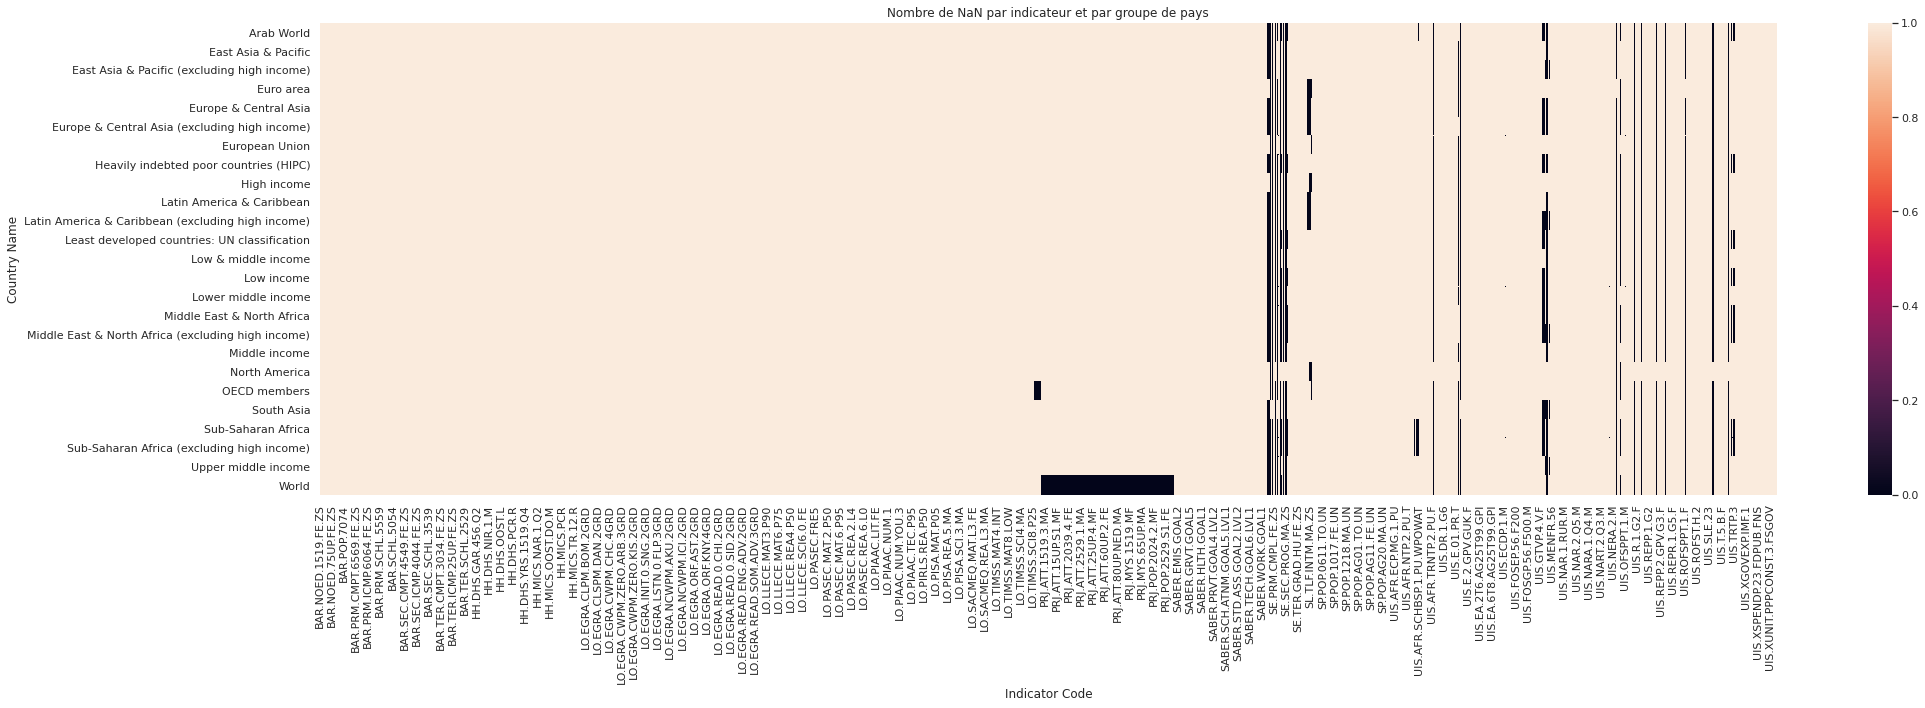

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Nombre de NaN par indicateur et par groupe de pays')
ax = sns.heatmap(data = Data_groupes)
plt.tight_layout()
plt.plot()

In [ ]:
Data_groupes.drop(Data_groupes.loc[:, Data_groupes.sum()<= Data_groupes.shape[0] * 80/100].columns.tolist(), axis=1, inplace=True)


In [ ]:
Indicateurs_groupes = Data_groupes.columns.tolist()


In [ ]:
Data_Countries.drop(Data_Countries.loc[:, Data_Countries.sum()<= Data_Countries.shape[0] * 80/100].columns.tolist(), axis=1, inplace=True)

In [ ]:
Indicateurs_Countries = Data_groupes.columns.tolist()


In [ ]:
Indicateurs_a_conserver = list(dict.fromkeys(Indicateurs_groupes + Indicateurs_Countries))


In [ ]:
Data = Data[Data['Indicator Code'].isin(Indicateurs_a_conserver)]


In [ ]:
Data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s,Region
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, both sexes (%)",UIS.NERA.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Indicateurs Definitifs

In [ ]:
Indicateurs_definitif = ['UIS.E.4',
              'UIS.E.3',
              'SE.TER.ENRL',
              'UIS.X.USCONST.3.FSGOV',
              'SP.POP.TOTL',
              'SP.POP.1524.TO.UN',
              'IT.NET.USER.P2']

In [ ]:
Data_Specific[Data_Specific['Indicator Code'].isin(Indicateurs_definitif)][['Indicator Name', 'Indicator Code', '2010s']].groupby(['Indicator Name', 'Indicator Code']).count().reset_index().sort_values(by='2010s',ascending=False)

,Indicator Name,Indicator Code,2010s
5,"Population, total",SP.POP.TOTL,240
3,Internet users (per 100 people),IT.NET.USER.P2,229
2,"Enrolment in upper secondary education, both sexes (number)",UIS.E.3,206
1,"Enrolment in tertiary education, all programmes, both sexes (number)",SE.TER.ENRL,197
4,"Population, ages 15-24, total",SP.POP.1524.TO.UN,181
0,"Enrolment in post-secondary non-tertiary education, both sexes (number)",UIS.E.4,137


In [ ]:
Data_Countries = Data_Specific[Data_Specific['Country Name'].isin(List_Countries)][Data_Specific['Indicator Code'].isin(Indicateurs_definitif)].drop(['NaN'], axis=1)
Data_Areas     = Data_Specific[Data_Specific['Country Name'].isin(Wrong_Names)         ][Data_Specific['Indicator Code'].isin(Indicateurs_definitif)].drop(['NaN'], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
def description_indicateurs(df, Indicateurs_definitif, groupe):
    df_per_indicator = pd.DataFrame()
    for indicateur in Indicateurs_definitif:
        df_temp = df[df['Indicator Code'] == indicateur]
        df_temp[indicateur] = df['2010s']
        df_temp.drop(['2010s', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
   
        if df_per_indicator.empty is False:
            df_per_indicator = df_per_indicator.merge(right = df_temp, how = 'outer', on = ['Country Code', 'Country Name', 'Region']).sort_values(by='Country Name')
        else:
            df_per_indicator = df_temp
            
            
    description = df_per_indicator.groupby([groupe])[Indicateurs_definitif].describe(percentiles = [0.5])
    for indicateur in Indicateurs_definitif:
        description[(indicateur, 'sum')] = description[(indicateur, 'count')] * description[(indicateur, 'mean')]
    colonnes = []
    for indicateur in Indicateurs_definitif:
        for stat in ['mean', 'std', '50%', 'sum'] :
            colonnes += [(indicateur, stat)]
    description = description[colonnes]
    description.reset_index(inplace=True)
    return description, df_per_indicator

In [ ]:
description_countries, df_countries = description_indicateurs(Data_Countries, Indicateurs_definitif, 'Region')
description_zones, df_zones     = description_indicateurs(Data_Areas, Indicateurs_definitif, 'Country Name')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
description_countries

Region        UIS.E.4                                \
                                        mean            std            50%   
0  East Asia & Pacific         179427.537019  279200.588624  27841.000000    
1  Europe & Central Asia       50031.265382   133776.183721  10813.000000    
2  Latin America & Caribbean   53614.363158   180525.720490  3103.000000     
3  Middle East & North Africa  9253.450000    10918.928517   5705.125000     
4  North America               799251.325000 NaN             799251.325000   
5  South Asia                  128660.658333  172484.615145  57321.566667    
6  Sub-Saharan Africa          36579.266667   69361.871705   4679.000000     

                      UIS.E.3                                           \
            sum          mean           std          50%           sum   
0  2.332558e+06  3.104989e+06  9.740027e+06  148159.400   6.520477e+07   
1  1.901188e+06  6.133072e+05  9.304212e+05  263745.900   3.066536e+07   
2  1.018673e+06  6.772967e+05  1.758547e+06  124699.625   2.302809e+07   
3  9.253450e+04  4.005455e+05  5.018389e+05  159624.325   6.408728e+06   
4  7.992513e+05  4.468791e+06  6.342389e+06  1675808.500  1.340637e+07   
5  7.719640e+05  9.415460e+06  1.924265e+07  1262076.500  6.590822e+07   
6  6.950061e+05  4.447514e+05  8.523980e+05  136223.100   1.512155e+07   

    SE.TER.ENRL                                            \
           mean           std           50%           sum   
0  3.029385e+06  8.077084e+06  2.848391e+05  5.755832e+07   
1  6.263273e+05  9.512607e+05  2.672384e+05  3.069004e+07   
2  7.455761e+05  1.548927e+06  1.753212e+05  2.087613e+07   
3  3.503854e+05  4.031066e+05  2.153028e+05  5.606167e+06   
4  1.013747e+07  1.433487e+07  1.013747e+07  2.027494e+07   
5  4.065026e+06  9.607159e+06  3.545678e+05  3.252021e+07   
6  1.769331e+05  3.084462e+05  7.001240e+04  6.192660e+06   

  UIS.X.USCONST.3.FSGOV               SP.POP.TOTL                              \
                   mean std 50% sum          mean           std           50%   
0 NaN                   NaN NaN NaN  6.723616e+07  2.413255e+08  2.027884e+06   
1 NaN                   NaN NaN NaN  1.395836e+07  2.079457e+07  5.530253e+06   
2 NaN                   NaN NaN NaN  1.584672e+07  3.842041e+07  3.578169e+06   
3 NaN                   NaN NaN NaN  1.221741e+07  1.287527e+07  7.142249e+06   
4 NaN                   NaN NaN NaN  1.171520e+08  1.733197e+08  3.513338e+07   
5 NaN                   NaN NaN NaN  2.123718e+08  4.363642e+08  2.985991e+07   
6 NaN                   NaN NaN NaN  1.982501e+07  3.005546e+07  1.156291e+07   

                SP.POP.1524.TO.UN                                            \
            sum              mean           std           50%           sum   
0  2.151557e+09  1.461382e+07      4.340982e+07  1.438153e+06  3.361179e+08   
1  7.537515e+08  2.203308e+06      2.918516e+06  1.107469e+06  9.694557e+07   
2  5.863286e+08  3.457839e+06      7.053947e+06  1.337724e+06  1.002773e+08   
3  2.199133e+08  2.167307e+06      2.486249e+06  1.042890e+06  3.901152e+07   
4  3.514559e+08  2.484806e+07      2.884377e+07  2.484806e+07  4.969611e+07   
5  1.698974e+09  4.122661e+07      8.182133e+07  6.607114e+06  3.298129e+08   
6  8.524755e+08  4.068331e+06      6.184988e+06  2.361723e+06  1.668016e+08   

  IT.NET.USER.P2                                     
            mean        std        50%          sum  
0  39.110122      27.014509  34.764191  1134.193534  
1  66.374672      21.119148  65.785332  3385.108250  
2  45.178755      17.067168  45.003936  1536.077659  
3  51.630411      25.062528  56.625398  929.347404   
4  83.859491      10.156386  85.361429  251.578473   
5  18.698948      11.954131  15.420493  149.591586   
6  13.577007      12.049061  9.218154   570.234274

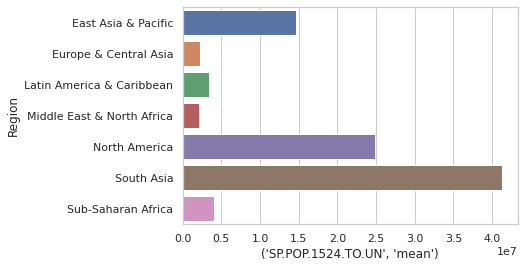

In [ ]:
sns.barplot(x= description_countries[('SP.POP.1524.TO.UN','mean')], y=description_countries['Region'])


In [ ]:
description_zones.head()


Country Name       UIS.E.4                    \
                                                   mean std           50%   
0  Arab World                              2.631211e+05 NaN  2.631211e+05   
1  Euro area                               1.101148e+06 NaN  1.101148e+06   
2  European Union                          1.454795e+06 NaN  1.454795e+06   
3  Heavily indebted poor countries (HIPC)  5.929243e+05 NaN  5.929243e+05   
4  High income                             3.131460e+06 NaN  3.131460e+06   

                    UIS.E.3                               SE.TER.ENRL      \
            sum        mean std         50%         sum          mean std   
0  2.631211e+05  11662032.4 NaN  11662032.4  11662032.4  9.222392e+06 NaN   
1  1.101148e+06  12966761.2 NaN  12966761.2  12966761.2  1.288954e+07 NaN   
2  1.454795e+06  20779584.4 NaN  20779584.4  20779584.4  2.005959e+07 NaN   
3  5.929243e+05  10772221.0 NaN  10772221.0  10772221.0  4.727721e+06 NaN   
4  3.131460e+06  44613044.8 NaN  44613044.8  44613044.8  5.401195e+07 NaN   

                              UIS.X.USCONST.3.FSGOV               SP.POP.TOTL  \
            50%           sum                  mean std 50% sum          mean   
0  9.222392e+06  9.222392e+06 NaN                   NaN NaN NaN  3.587756e+08   
1  1.288954e+07  1.288954e+07 NaN                   NaN NaN NaN  3.376978e+08   
2  2.005959e+07  2.005959e+07 NaN                   NaN NaN NaN  5.057606e+08   
3  4.727721e+06  4.727721e+06 NaN                   NaN NaN NaN  6.862718e+08   
4  5.401195e+07  5.401195e+07 NaN                   NaN NaN NaN  1.169169e+09   

                                  SP.POP.1524.TO.UN              \
  std           50%           sum              mean std 50% sum   
0 NaN  3.587756e+08  3.587756e+08 NaN               NaN NaN NaN   
1 NaN  3.376978e+08  3.376978e+08 NaN               NaN NaN NaN   
2 NaN  5.057606e+08  5.057606e+08 NaN               NaN NaN NaN   
3 NaN  6.862718e+08  6.862718e+08 NaN               NaN NaN NaN   
4 NaN  1.169169e+09  1.169169e+09 NaN               NaN NaN NaN   

  IT.NET.USER.P2                            
            mean std        50%        sum  
0  31.834459     NaN  31.834459  31.834459  
1  75.580997     NaN  75.580997  75.580997  
2  72.846488     NaN  72.846488  72.846488  
3  9.205370      NaN  9.205370   9.205370   
4  76.846043     NaN  76.846043  76.846043

In [ ]:
data_orig[data_orig['Indicator Code'] == 'UIS.E.4']['Indicator Name'].unique()[0]

'Enrolment in post-secondary non-tertiary education, both sexes (number)'

In [ ]:
data_orig[data_orig['Indicator Code'].isin(['UIS.X.USCONST.3.FSGOV'])].count().sum()


0

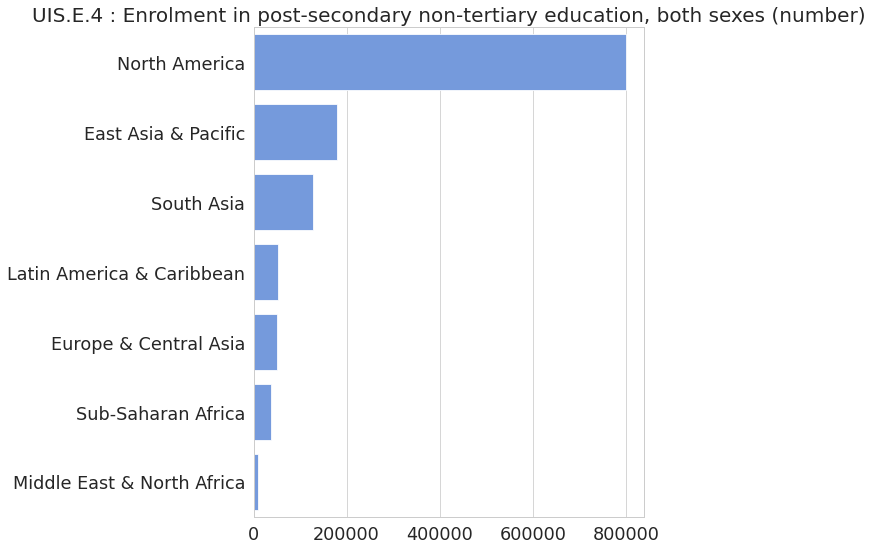

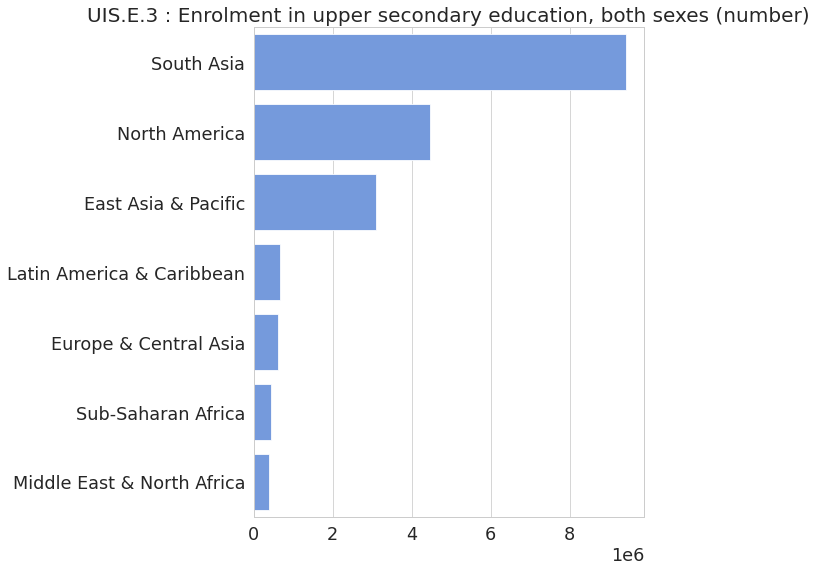

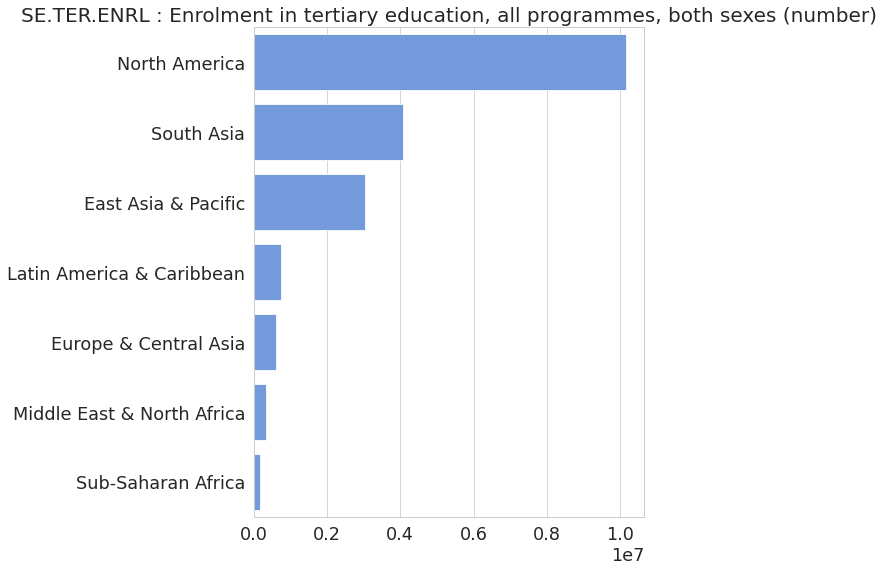



UIS.X.USCONST.3.FSGOV  : Aucune donnée à afficher.


<Figure size 504x648 with 0 Axes>

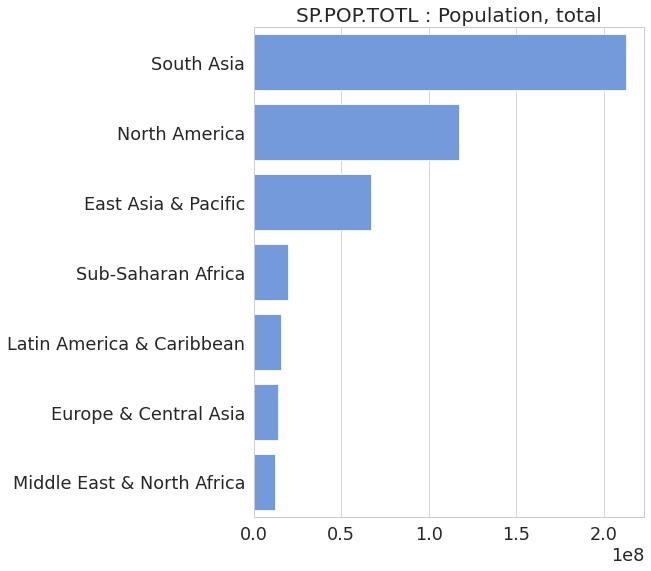

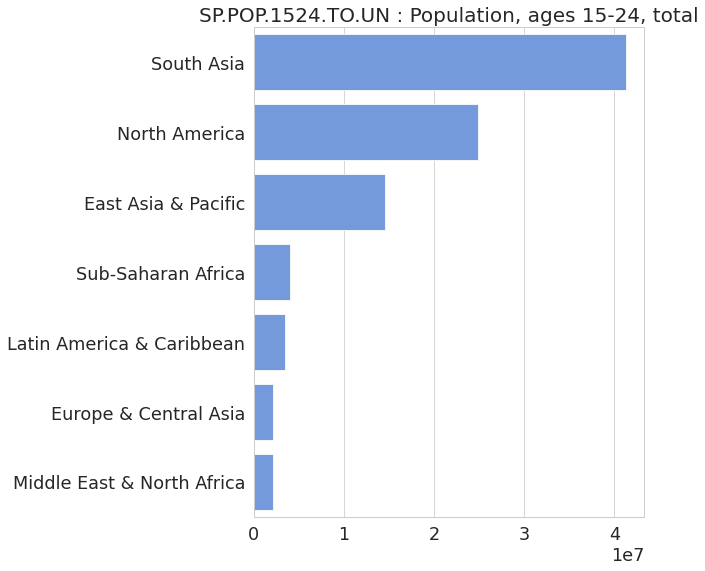

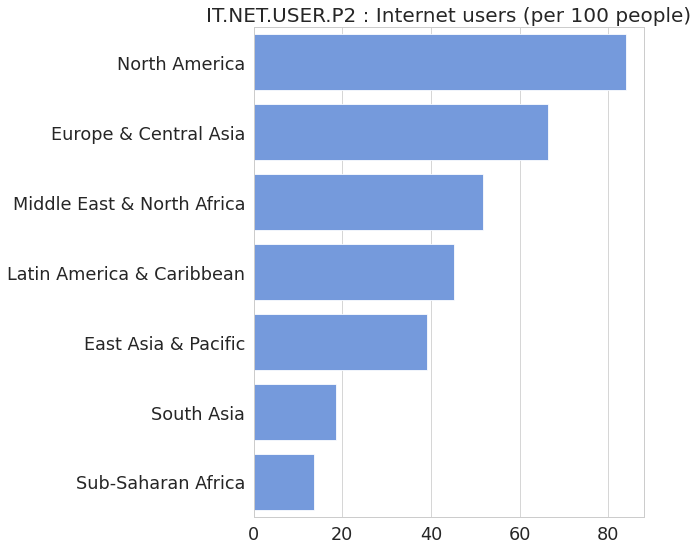

In [ ]:
for indicateur in Indicateurs_definitif:
    plt.figure(figsize = (7,9))
    sns.set_context("paper", font_scale=2)
    if data_orig[data_orig['Indicator Code'].isin([indicateur])].count().sum() > 0 :
        chaine = indicateur + ' : ' + data_orig[data_orig['Indicator Code'] == indicateur]['Indicator Name'].unique()[0]
        plt.title(chaine, size=20)
        description_countries.sort_values(by=(indicateur, 'mean'), ascending=False, inplace=True)
        ax = plt.gca()
        sns.barplot(x = description_countries[(indicateur, 'mean')], y=description_countries['Region'], color='cornflowerblue')
        ax.set_ylabel('')    
        ax.set_xlabel('')
        plt.show()
        print('\n')
    else:
        print(indicateur, ' : Aucune donnée à afficher.')


In [ ]:
df_countries[((df_countries['IT.NET.USER.P2'] > 15) & (df_countries['SP.POP.1524.TO.UN'] > 100000000))  |  ((df_countries['IT.NET.USER.P2'] > 60) & (df_countries['SP.POP.1524.TO.UN'] > 1000000))].sort_values(by='SP.POP.1524.TO.UN',ascending = False)[['Country Name']]

,Country Name
78,India
38,China
190,United States
86,Japan
62,Germany
189,United Kingdom
58,France
106,Malaysia
140,Poland
32,Canada


In [ ]:
df_countries['customers'] = df_countries['UIS.E.3'] + df_countries['UIS.E.4'] + df_countries['SE.TER.ENRL'] 
print('liste des pays avec le plus de lycéens et étudiants')
df_countries.sort_values(by='customers', ascending=False)[['Country Name', 'customers']].head(20)

liste des pays avec le plus de lycéens et étudiants


,Country Name,customers
160,South Asia,9.847945e+07
78,India,8.103193e+07
38,China,8.083619e+07
190,United States,3.280134e+07
25,Brazil,1.774776e+07
86,Japan,7.552915e+06
14,Bangladesh,7.498949e+06
62,Germany,6.343626e+06
133,Pakistan,6.309889e+06
189,United Kingdom,5.770901e+06


In [ ]:
df_countries.drop([160],axis=0, inplace = True)

In [ ]:
df_countries['customers'] = df_countries['UIS.E.3'] + df_countries['UIS.E.4'] + df_countries['SE.TER.ENRL'] 
print('liste des pays avec le plus de lycéens et étudiants')
df_countries.sort_values(by='customers', ascending=False)[['Country Name', 'customers']].head(20)

liste des pays avec le plus de lycéens et étudiants


,Country Name,customers
78,India,8.103193e+07
38,China,8.083619e+07
190,United States,3.280134e+07
25,Brazil,1.774776e+07
86,Japan,7.552915e+06
14,Bangladesh,7.498949e+06
62,Germany,6.343626e+06
133,Pakistan,6.309889e+06
189,United Kingdom,5.770901e+06
139,Philippines,5.597267e+06


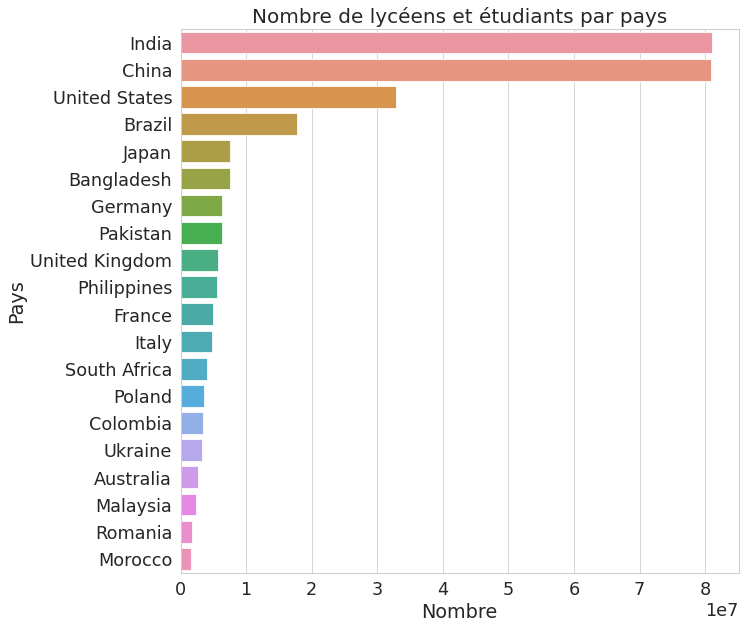

In [ ]:
plt.figure(figsize = (10,10))
sns.set_context("paper", font_scale=2)

ax = plt.gca()
sns.barplot(x = df_countries.sort_values(by='customers', ascending=False)['customers'].head(20), y=df_countries.sort_values(by='customers', ascending=False)['Country Name'].head(20))
plt.title('Nombre de lycéens et étudiants par pays', size=20)
plt.xlabel('Nombre')
plt.ylabel('Pays')
plt.show()

In [ ]:
df_countries['potential_customers'] = df_countries['customers'] * df_countries['IT.NET.USER.P2']/100

In [ ]:
df_countries.sort_values(by='potential_customers', ascending=False)[['Country Name', 'IT.NET.USER.P2', 'customers', 'potential_customers']].head(20)

,Country Name,IT.NET.USER.P2,customers,potential_customers
38,China,44.585731,8.083619e+07,3.604141e+07
190,United States,73.035771,3.280134e+07,2.395671e+07
78,India,17.399603,8.103193e+07,1.409923e+07
25,Brazil,51.214529,1.774776e+07,9.089430e+06
86,Japan,85.306401,7.552915e+06,6.443120e+06
62,Germany,84.745271,6.343626e+06,5.375923e+06
189,United Kingdom,89.441457,5.770901e+06,5.161578e+06
58,France,81.789500,4.954075e+06,4.051913e+06
84,Italy,56.780535,4.734863e+06,2.688480e+06
139,Philippines,42.447732,5.597267e+06,2.375913e+06


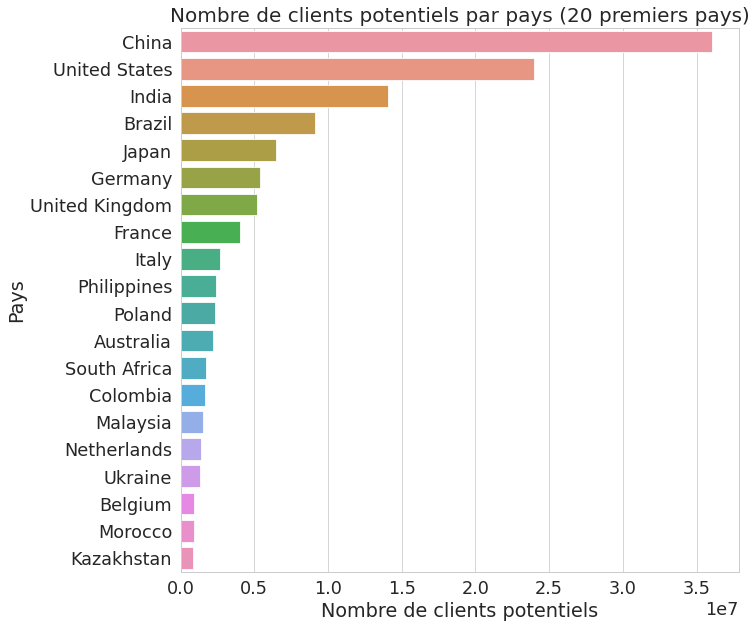

In [ ]:
clients_potentiels = df_countries.sort_values(by='potential_customers', na_position='first', ascending=True)[['Country Name', 'IT.NET.USER.P2', 'customers', 'potential_customers']].tail(20).sort_values(by='potential_customers',ascending=False)
plt.figure(figsize = (10,10))
sns.set_context("paper", font_scale=2)
plt.title('Nombre de clients potentiels par pays (20 premiers pays)', fontsize=20)
ax = plt.gca()
sns.barplot(x = clients_potentiels['potential_customers'], y=clients_potentiels['Country Name'])
plt.xlabel('Nombre de clients potentiels')
plt.ylabel('Pays')
plt.show()

In [ ]:
#on garde les pays potentiels avec plus de 1 million de clients potentiels
selected_countries = clients_potentiels[clients_potentiels['potential_customers'] > 1000000]['Country Name'].tolist()
print(selected_countries)


['China', 'United States', 'India', 'Brazil', 'Japan', 'Germany', 'United Kingdom', 'France', 'Italy', 'Philippines', 'Poland', 'Australia', 'South Africa', 'Colombia', 'Malaysia', 'Netherlands', 'Ukraine']


In [ ]:
data_final = data_orig[data_orig['Country Name'].isin(selected_countries) & data_orig['Indicator Code'].isin(['UIS.E.3', 'UIS.E.4', 'SE.TER.ENRL', 'IT.NET.USER.P2'])]

In [ ]:
data_final.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
129446,Australia,AUS,"Enrolment in post-secondary non-tertiary education, both sexes (number)",UIS.E.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.550080e+05,1.628850e+05,1.711580e+05,175899.0,180352.0,170723.0,160834.0,158090.0,165817.00,163457.00,188504.00,216052.0,2.559560e+05,284019.0,2.616280e+05,257200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129479,Australia,AUS,"Enrolment in tertiary education, all programmes, both sexes (number)",SE.TER.ENRL,179664.0,193532.0,208149.0,223855.0,252972.0,274738.0,289701.0,300030.0,309783.0,317496.0,323716.0,334030.0,337953.0,349243.0,358498.0,370048.0,390706.0,393734.0,420845.0,441076.0,485075.000000,534530.000000,559365.000000,922699.000000,932969.000000,964998.000000,1.002476e+06,1.041648e+06,869172.000000,8.456360e+05,8.451320e+05,8.686890e+05,1012210.0,1005977.0,1002998.0,1024589.0,1040153.0,1083715.00,1117804.00,1199845.00,1276488.0,1.324257e+06,1364203.0,1.390478e+06,1453521.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129489,Australia,AUS,"Enrolment in upper secondary education, both sexes (number)",UIS.E.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.238133e+06,1.321502e+06,1.211219e+06,1221293.0,1294149.0,1232456.0,1222599.0,904649.0,912054.00,942609.00,962380.00,990951.0,1.040865e+06,1088366.0,1.079568e+06,1104162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129650,Australia,AUS,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.585095,1.097204,1.768765,1.974611,2.232101,2.759655,3.275250e+00,1.636936e+01,30.813239,4.078378e+01,4.675612e+01,5.268927e+01,NaN,NaN,NaN,63.0,66.0,69.45,71.67,74.25,76.0,7.948770e+01,79.0,8.345350e+01,84.0,84.560519,88.238658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188086,Brazil,BRA,"Enrolment in post-secondary non-tertiary education, both sexes (number)",UIS.E.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.927960e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_countries[((df_countries['IT.NET.USER.P2'] > 15) & (df_countries['SP.POP.1524.TO.UN'] > 100000000))  |  ((df_countries['IT.NET.USER.P2'] > 60) & (df_countries['SP.POP.1524.TO.UN'] > 1000000))].sort_values(by='SP.POP.1524.TO.UN',ascending = False)[['Country Name']]

,Country Name
78,India
38,China
190,United States
86,Japan
62,Germany
189,United Kingdom
58,France
106,Malaysia
140,Poland
32,Canada


In [ ]:
#on va créer un indicateur lycée + supérieur:

df_countries['customers'] = df_countries['UIS.E.3'] + df_countries['UIS.E.4'] + df_countries['SE.TER.ENRL'] 
print('liste des pays avec le plus de lycéens et étudiants')
df_countries.sort_values(by='customers', ascending=False)[['Country Name', 'customers']].head(20)

liste des pays avec le plus de lycéens et étudiants


,Country Name,customers
78,India,8.103193e+07
38,China,8.083619e+07
190,United States,3.280134e+07
25,Brazil,1.774776e+07
86,Japan,7.552915e+06
14,Bangladesh,7.498949e+06
62,Germany,6.343626e+06
133,Pakistan,6.309889e+06
189,United Kingdom,5.770901e+06
139,Philippines,5.597267e+06


In [ ]:
df_countries['potential_customers'] = df_countries['customers'] * df_countries['IT.NET.USER.P2']/100

In [ ]:
df_countries.sort_values(by='potential_customers', ascending=False)[['Country Name', 'IT.NET.USER.P2', 'customers', 'potential_customers']].head(20)

,Country Name,IT.NET.USER.P2,customers,potential_customers
38,China,44.585731,8.083619e+07,3.604141e+07
190,United States,73.035771,3.280134e+07,2.395671e+07
78,India,17.399603,8.103193e+07,1.409923e+07
25,Brazil,51.214529,1.774776e+07,9.089430e+06
86,Japan,85.306401,7.552915e+06,6.443120e+06
62,Germany,84.745271,6.343626e+06,5.375923e+06
189,United Kingdom,89.441457,5.770901e+06,5.161578e+06
58,France,81.789500,4.954075e+06,4.051913e+06
84,Italy,56.780535,4.734863e+06,2.688480e+06
139,Philippines,42.447732,5.597267e+06,2.375913e+06


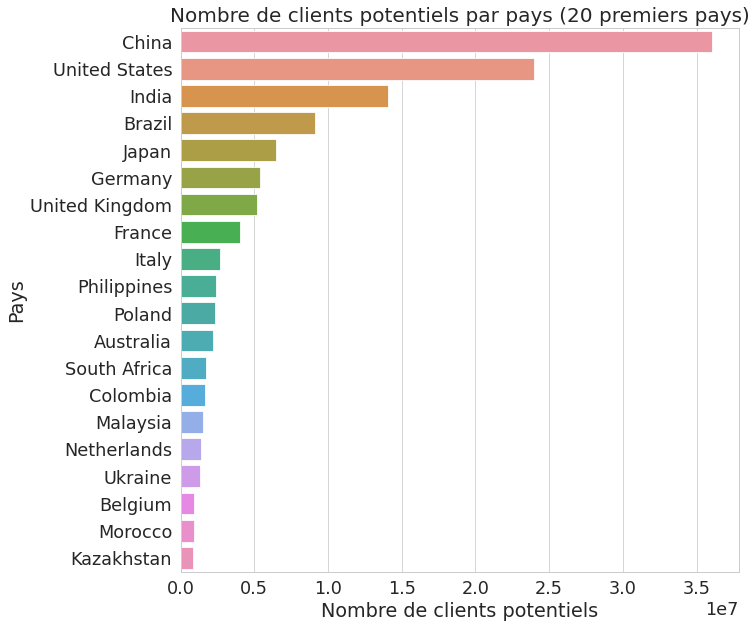

In [ ]:
clients_potentiels = df_countries.sort_values(by='potential_customers', na_position='first', ascending=True)[['Country Name', 'IT.NET.USER.P2', 'customers', 'potential_customers']].tail(20).sort_values(by='potential_customers',ascending=False)
plt.figure(figsize = (10,10))
sns.set_context("paper", font_scale=2)
plt.title('Nombre de clients potentiels par pays (20 premiers pays)', fontsize=20)
ax = plt.gca()
sns.barplot(x = clients_potentiels['potential_customers'], y=clients_potentiels['Country Name'])
plt.xlabel('Nombre de clients potentiels')
plt.ylabel('Pays')
plt.show()

In [ ]:
selected_countries = clients_potentiels[clients_potentiels['potential_customers'] > 1000000]['Country Name'].tolist()
print(selected_countries)

['China', 'United States', 'India', 'Brazil', 'Japan', 'Germany', 'United Kingdom', 'France', 'Italy', 'Philippines', 'Poland', 'Australia', 'South Africa', 'Colombia', 'Malaysia', 'Netherlands', 'Ukraine']


In [ ]:
future = {}
for country in selected_countries:
    future[country] = (data_decades[(data_decades['Country Name'] == country) & (data_decades['Indicator Code'] == 'UIS.E.3')]['2020s'].values
              +data_decades[(data_decades['Country Name'] == country) & (data_decades['Indicator Code'] == 'UIS.E.4')]['2020s'].values
              +data_decades[(data_decades['Country Name'] == country) & (data_decades['Indicator Code'] == 'SE.TER.ENRL')]['2020s'].values)*data_decades[(data_decades['Country Name'] == country) & (data_decades['Indicator Code'] == 'IT.NET.USER.P2')]['2020s'].values/100

In [ ]:
future

{'Australia': array([], dtype=float64),
 'Brazil': array([], dtype=float64),
 'China': array([], dtype=float64),
 'Colombia': array([], dtype=float64),
 'France': array([], dtype=float64),
 'Germany': array([], dtype=float64),
 'India': array([], dtype=float64),
 'Italy': array([], dtype=float64),
 'Japan': array([], dtype=float64),
 'Malaysia': array([], dtype=float64),
 'Netherlands': array([], dtype=float64),
 'Philippines': array([], dtype=float64),
 'Poland': array([], dtype=float64),
 'South Africa': array([], dtype=float64),
 'Ukraine': array([], dtype=float64),
 'United Kingdom': array([], dtype=float64),
 'United States': array([], dtype=float64)}

In [ ]:
data_final = data_orig[data_orig['Country Name'].isin(selected_countries) & data_orig['Indicator Code'].isin(['UIS.E.3', 'UIS.E.4', 'SE.TER.ENRL', 'IT.NET.USER.P2'])]


In [ ]:
data_final_melt = data_final.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], value_vars = ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'], var_name = 'Year', value_name = 'Value')

In [ ]:
data_final_melt['Year'] = data_final_melt['Year'].astype('int32')


In [ ]:
data_final_melt = data_final_melt[data_final_melt['Year'] > 2010]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launch

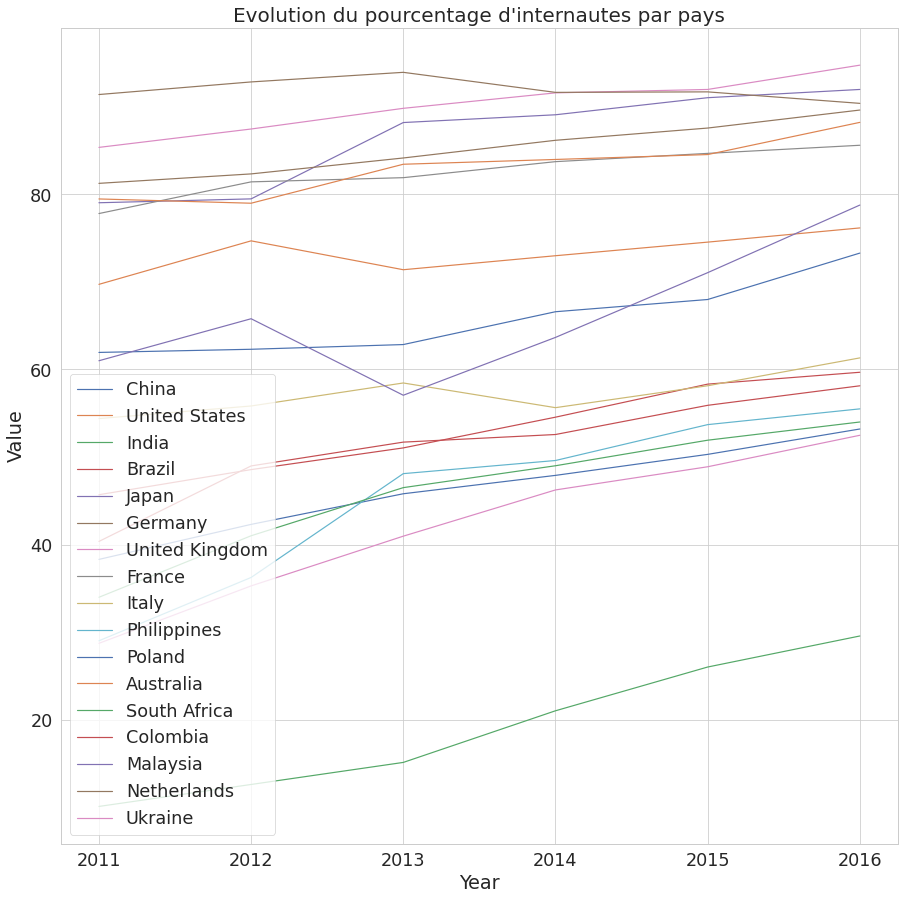

In [ ]:
plt.figure(figsize = (15,15))
for country in selected_countries:
    sns.lineplot(data_final_melt[data_final_melt['Indicator Code'] == 'IT.NET.USER.P2'][data_final_melt['Country Name'] == country ]['Year'],
            data_final_melt[data_final_melt['Indicator Code'] == 'IT.NET.USER.P2'][data_final_melt['Country Name'] == country ]['Value'])
plt.legend(selected_countries, loc = 'lower left', )
plt.title('Evolution du pourcentage d\'internautes par pays', size=20)
plt.show()

In [ ]:
#évolution de l'utilisation d'internet
for country in selected_countries:
    for year in data_final_melt['Year'].unique().tolist():
        data_final_melt = data_final_melt.append({'Country Name' : country,
                         'Country Code' : '',
                         'Indicator Name' : '',
                         'Indicator Code' : 'CUSTOM',
                         'Region' : '',
                         'Year' : int(year),
                         'Value' :  data_final_melt[data_final_melt['Indicator Code'] == 'UIS.E.3'][data_final_melt['Country Name'] == country ][data_final_melt['Year'] == int(year)]['Value'].iloc[0] + 
        data_final_melt[data_final_melt['Indicator Code'] == 'UIS.E.4'][data_final_melt['Country Name'] == country ][data_final_melt['Year'] == int(year)]['Value'].iloc[0] + 
        data_final_melt[data_final_melt['Indicator Code'] == 'SE.TER.ENRL'][data_final_melt['Country Name'] == country ][data_final_melt['Year'] == int(year)]['Value'].iloc[0]
                                     }
                                     , ignore_index = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarn

In [ ]:
for country in selected_countries:
    for year in data_final_melt['Year'].unique().tolist():
        data_final_melt = data_final_melt.append({'Country Name' : country,
                         'Country Code' : '',
                         'Indicator Name' : '',
                         'Indicator Code' : 'PRODUCT',
                         'Region' : '',
                         'Year' : int(year),
                         'Value' :  data_final_melt[data_final_melt['Indicator Code'] == 'CUSTOM'][data_final_melt['Country Name'] == country ][data_final_melt['Year'] == int(year)]['Value'].iloc[0] * 
        data_final_melt[data_final_melt['Indicator Code'] == 'IT.NET.USER.P2'][data_final_melt['Country Name'] == country ][data_final_melt['Year'] == int(year)]['Value'].iloc[0]/100
                                     }
                                     , ignore_index = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexe

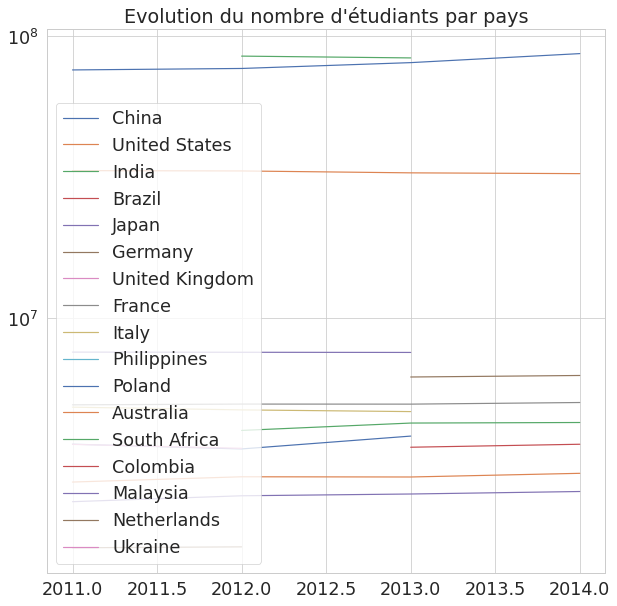

In [ ]:
#évolution du nombre d'étudiants
plt.figure(figsize = (10,10))
ax = plt.gca()
ax.set_yscale('log')
for country in selected_countries:
    plt.plot(data_final_melt[data_final_melt['Indicator Code'] == 'CUSTOM'][data_final_melt['Country Name'] == country ]['Year'],
            data_final_melt[data_final_melt['Indicator Code'] == 'CUSTOM'][data_final_melt['Country Name'] == country ]['Value'])
plt.legend(selected_countries, loc = 'lower left')
plt.title('Evolution du nombre d\'étudiants par pays')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexe

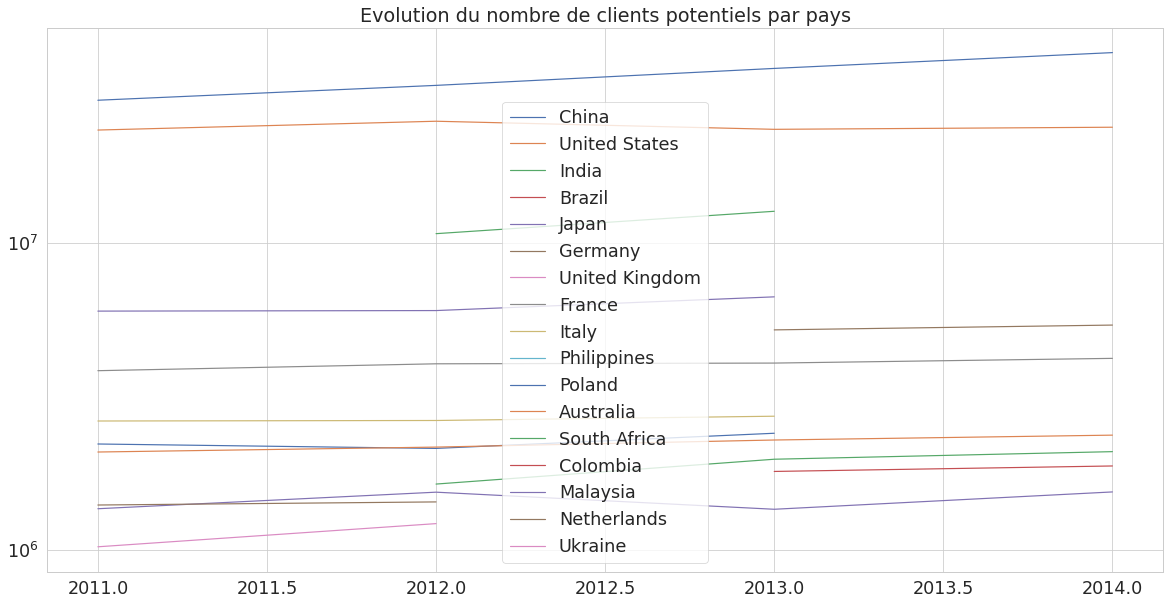

In [ ]:
#évolution du nombre d'étudiants
plt.figure(figsize = (20,10))
ax = plt.gca()
ax.set_yscale('log')
for country in selected_countries:
    plt.plot(data_final_melt[data_final_melt['Indicator Code'] == 'PRODUCT'][data_final_melt['Country Name'] == country ]['Year'],
            data_final_melt[data_final_melt['Indicator Code'] == 'PRODUCT'][data_final_melt['Country Name'] == country ]['Value'])
plt.legend(selected_countries)
plt.title('Evolution du nombre de clients potentiels par pays')

plt.show()

In [ ]:
data_final_melt

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value,Region
0,Australia,AUS,"Enrolment in post-secondary non-tertiary education, both sexes (number)",UIS.E.4,2011,2.559560e+05,NaN
1,Australia,AUS,"Enrolment in tertiary education, all programmes, both sexes (number)",SE.TER.ENRL,2011,1.324257e+06,NaN
2,Australia,AUS,"Enrolment in upper secondary education, both sexes (number)",UIS.E.3,2011,1.040865e+06,NaN
3,Australia,AUS,Internet users (per 100 people),IT.NET.USER.P2,2011,7.948770e+01,NaN
4,Brazil,BRA,"Enrolment in post-secondary non-tertiary education, both sexes (number)",UIS.E.4,2011,NaN,NaN
...,...,...,...,...,...,...,...
2443,Ukraine,,,PRODUCT,2080,NaN,
2444,Ukraine,,,PRODUCT,2085,NaN,
2445,Ukraine,,,PRODUCT,2090,NaN,
2446,Ukraine,,,PRODUCT,2095,NaN,


In [ ]:
potentiel = pd.DataFrame(columns = ['Country', 'Ecart à saturation internet', 'Potentiel clients'])
for country in data_final_melt[data_final_melt['Indicator Code'] == 'IT.NET.USER.P2'].sort_values(by='Value')['Country Name'].unique():
    implantation_internet = round(data_final_melt[(data_final_melt['Indicator Code'] == 'IT.NET.USER.P2') & (data_final_melt['Country Name'] == country) & (data_final_melt['Year'] == 2013)]['Value'].unique()[0],2)
    if implantation_internet > 80 :
        implantation_internet = 80
    potentiel = pd.concat([potentiel, 
                          pd.DataFrame(
                              {'Country' : [country] ,
                               'Ecart à saturation internet' : [80 - implantation_internet],
                               'Potentiel clients' : [round((80 - implantation_internet) * data_final_melt[(data_final_melt['Indicator Code'] == 'CUSTOM') & (data_final_melt['Country Name'] == country ) & (data_final_melt['Year'] == 2013)]['Value'].unique()[0]/100,0)]
                                      }
                          )]
             )


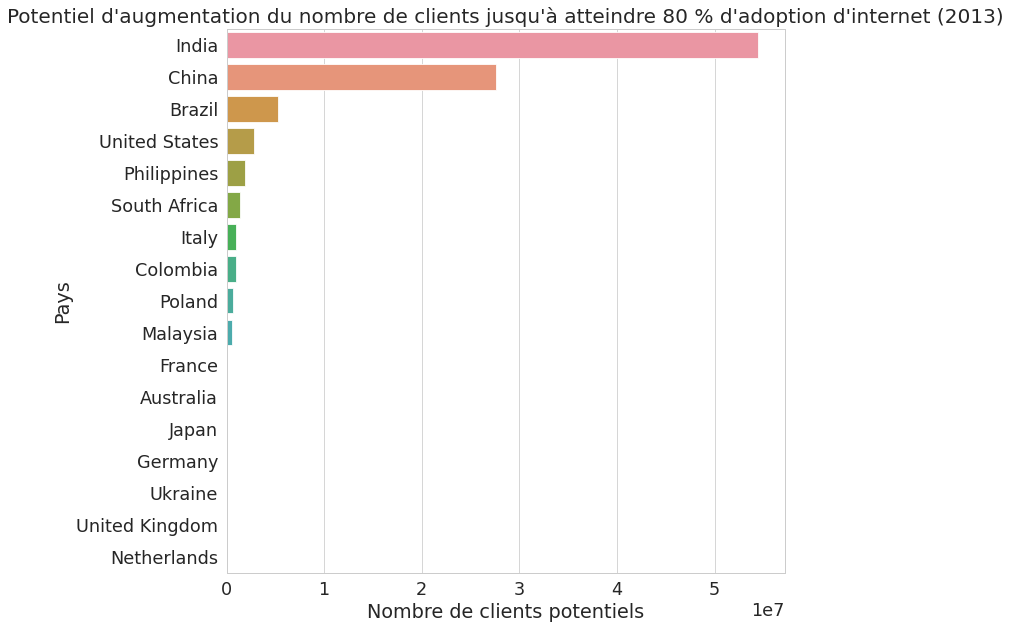

In [ ]:
plt.figure(figsize = (10,10))
sns.set_context("paper", font_scale=2)

ax = plt.gca()
sns.barplot(x = potentiel.sort_values(by='Potentiel clients', ascending=False)['Potentiel clients'], y = potentiel.sort_values(by='Potentiel clients', ascending=False)['Country'])
plt.title('Potentiel d\'augmentation du nombre de clients jusqu\'à atteindre 80 % d\'adoption d\'internet (2013)', size=20)
plt.xlabel('Nombre de clients potentiels')
plt.ylabel('Pays')
plt.show()

In [ ]:
selected_countries

['China',
 'United States',
 'India',
 'Brazil',
 'Japan',
 'Germany',
 'United Kingdom',
 'France',
 'Italy',
 'Philippines',
 'Poland',
 'Australia',
 'South Africa',
 'Colombia',
 'Malaysia',
 'Netherlands',
 'Ukraine']